# Python Basics

These assignments aim to get you acquainted with Python, which is an important requirement for all the research done at Solarillion Foundation. Apart from teaching you Python, these assignments also aim to make you a better programmer and cultivate better coding practices. 

Visit these links for more details: <br>
PEP8 Practices: https://www.python.org/dev/peps/pep-0008/ <br>
Check PEP8: http://pep8online.com <br>
Python Reference: https://www.py4e.com/lessons <br>

Do use Google efficiently, and refer to StackOverflow for clarifying any programming doubts. If you're still stuck, feel free to ask a TA to help you.

Each task in the assignment comprises of at least two cells. There are function definitions wherein you will name the function(s), and write code to solve the problem at hand. You will call the function(s) in the last cell of each task, and check your output.

We encourage you to play around and learn as much as possible, and be as creative as you can get. More than anything, have fun doing these assignments. Enjoy!

# Important
* **Only the imports and functions must be present when you upload this notebook to GitHub for verification.** 
* **Do not upload it until you want to get it verified. Do not change function names or add extra cells or code, or remove anything.**
* **For your rough work and four showing your code to TAs, use a different notebook with the name Module2Playground.ipynb and copy only the final functions to this notebook for verification.**

# Module 3
Scope: Algorithmic Thinking, Programming

## Imports - Always Execute First!
Import any modules and turn on any magic here:

In [4]:
from IPython import get_ipython
ipy = get_ipython()
if ipy is not None:
    ipy.run_line_magic("load_ext", "pycodestyle_magic")
    ipy.run_line_magic("pycodestyle_on", "")

ModuleNotFoundError: No module named 'pycodestyle_magic'

## Burger Mania

In [5]:
"""
Imagine that you are a restaurant's cashier and are trying to keep records for analysing profits.

Your restaurant sells 7 different items:
    1. Burgers - $4.25
    2. Nuggets - $2.50
    3. French Fries - $2.00
    4. Small Drink - $1.25
    5. Medium Drink - $1.50
    6. Large Drink - $1.75
    7. Salad - $3.75

Create a program to randomly generate the orders of each customer as a string of numbers
(corresponding to the item) and calculate the cost of the order. For example, if the generated
string is 5712335, the program should understand that the customer has ordered 1 burger, 1 
portion of nuggets, 2 portions of fries, 2 medium drinks and 1 salad. It should then compute the
cost ($17.50). The final cost is calculated after considering discounts for combo offers and
adding 18% GST.

The combo offers are:
A) 1 Burger + 1 Portion of Fries + 1 Drink -> 20% discount
B) 1 Burger + 1 Portion of Nuggets + 1 Salad + 1 Drink -> 35% discount

The final cost of the 5712335 order is $13.4225. The profit gained each day has to be recorded for
30 days and plotted for analysis.

Note:
    - There will be at least 20 customers and not more than 50 customers per day. Each customer
      orders at least 3 items and not more than 7 items.
    - If there is a possibility of availing multiple combo offers in an order, the program
      should select the offer with maximum discount.
"""

"\nImagine that you are a restaurant's cashier and are trying to keep records for analysing profits.\n\nYour restaurant sells 7 different items:\n    1. Burgers - $4.25\n    2. Nuggets - $2.50\n    3. French Fries - $2.00\n    4. Small Drink - $1.25\n    5. Medium Drink - $1.50\n    6. Large Drink - $1.75\n    7. Salad - $3.75\n\nCreate a program to randomly generate the orders of each customer as a string of numbers\n(corresponding to the item) and calculate the cost of the order. For example, if the generated\nstring is 5712335, the program should understand that the customer has ordered 1 burger, 1 \nportion of nuggets, 2 portions of fries, 2 medium drinks and 1 salad. It should then compute the\ncost ($17.50). The final cost is calculated after considering discounts for combo offers and\nadding 18% GST.\n\nThe combo offers are:\nA) 1 Burger + 1 Portion of Fries + 1 Drink -> 20% discount\nB) 1 Burger + 1 Portion of Nuggets + 1 Salad + 1 Drink -> 35% discount\n\nThe final cost of the

In [6]:
import random
def generate_order():
    string = ""
    opc = random.randint(3,7)      #orders_per_customer
    temp_list = []
    for j in range(opc):
        temp_list.append(random.randint(1,7))
    string += ''.join([str(i) for i in temp_list])
    return string

"""
        Function 1: generate_order()
        Return: A randomly generated order string
"""
    

'\n        Function 1: generate_order()\n        Return: A randomly generated order string\n'

In [12]:
def compute_cost():
    cpd = random.randint(20,50)    #customers_per_day
    d = {1 : 4.25, 2 : 2.50, 3 : 2.00, 4 : 1.25, 5 : 1.50, 6 : 1.75, 7 : 3.75}
    cost_day = 0.0  # for an entire day
    count_dict = {}
    cost = 0
    cost_list_customer = []
    for p in range(cpd):
        string = generate_order()
        order_list_integer = int(string)
        j = order_list_integer
        li = []
        while(j>1):
            li.append(j%10)
            j = int(j/10)
        count_dict = {x : li.count(x) for x in set(li)}
        for k in count_dict:
            cost += (count_dict[k]*d[k])
        #discount
        try:
            if (count_dict[1]==1 and count_dict[2]==1 and count_dict[7]==1 and(count_dict[4]==1 or count_dict[5]==1 or count_dict[6]==1)):
                cost = cost*0.65
            elif (count_dict[1]==1 and count_dict[3]==1 and(count_dict[4]==1 or count_dict[5]==1 or count_dict[6]==1)):
                cost = cost*0.80
            else:
                pass
        except KeyError:
            pass
        cost += cost*0.18
        cost_list_customer.append(cost)
        li.clear()
        count_dict.clear()
    for i in cost_list_customer:
        cost_day+=i
    return cost_day




    """
            Function 2: compute_cost(order)
            Parameters: order (String)
            Return: Final cost of order
    """

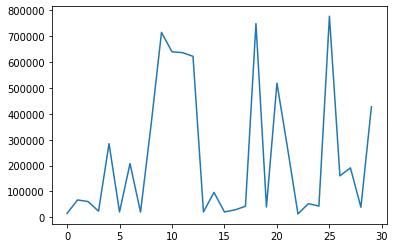

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
def simulate_restaurant():
    raw_data = {}
    for i in range(30):
        k = compute_cost()
        key = "COST"
        raw_data.setdefault(key, [])
        raw_data[key].append(k)
    
    df = pd.DataFrame(raw_data, columns = ['COST'])
    plt.plot(df.index, df['COST'])
    plt.show()
        
    
    """
        Function 3: simulate_restaurant()
        Purpose: Simulate the restaurant's operation using the previously declared functions,
                 based on the constraints mentioned in the question
        Output: Plot of profit over 30 days
    """
simulate_restaurant()  

You're done with the Basics of Python! Give yourself a pat on the back.

Now, choose an area you want to work on - Machine Learning, Internet of Things or Microgrids - and get started with the assignments. You could also choose to do assignments from multiple areas, it's entirely up to you. Hope you have fun!